# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

# Import libraries & download dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns  
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

from sklearn.preprocessing import OrdinalEncoder

from tqdm import tqdm
from typing import Optional

import gensim
import gensim.downloader as gloader  

import re

!pip install python-Levenshtein
import Levenshtein

!pip install pytorch-crf
import torchcrf

import itertools
from functools import partial

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

     |████████████████████████████████| 50 kB 2.5 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149866 sha256=76b3a81215cfe4bcdb84eb32848be9466fd9061f73662adfb32983200754cd16
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [2]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
!unzip -q dependency_treebank.zip

--2021-12-18 15:09:13--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457429 (447K) [application/zip]
Saving to: ‘dependency_treebank.zip’

dependency_treebank 100%[===================>] 446.71K  --.-KB/s    in 0.03s   

2021-12-18 15:09:13 (12.7 MB/s) - ‘dependency_treebank.zip’ saved [457429/457429]



# Dataframe creation and split into train, val and test set

The way to split the dataset is already defined:  
train set : documents 1-100;  
validation set : documents 101-150;  
test set : documents 151-199;

In [93]:
corpus_path = 'dependency_treebank/'
file_list = sorted(os.listdir(corpus_path))

dfs = [pd.read_csv(corpus_path + f, sep='\t', names=['word', 'label', 'foo']).drop('foo', 1)
          for f in file_list]


dataset = pd.concat(dfs, ignore_index=True)
dataset['word'] = dataset['word'].transform(lambda x : x.lower())  

train_set = pd.concat(dfs[:100], ignore_index=True)
train_set['word'] = train_set['word'].transform(lambda x : x.lower())

val_set = pd.concat(dfs[100:150], ignore_index=True)
val_set['word'] = val_set['word'].transform(lambda x : x.lower())

test_set = pd.concat(dfs[150:199], ignore_index=True)
test_set['word'] = test_set['word'].transform(lambda x : x.lower())

labels = dataset['label'].unique()
words = dataset['word'].unique()

In [4]:
encoder = OrdinalEncoder(dtype=np.int64)
encoder.fit(labels.reshape(-1, 1)) 

OrdinalEncoder(dtype=<class 'numpy.int64'>)

In [5]:
EMBEDDING_SIZE = 50
embedder = gloader.load(f'glove-wiki-gigaword-{EMBEDDING_SIZE}')

[==================================================] 100.0% 66.0/66.0MB downloaded


We started splitting documents in sentences using 
punctuation labelled as '.' as end of sentences.

In [6]:
train_stops = train_set[(train_set['label']=='.')].index
max_length = max(train_stops[1:] - train_stops[:-1])

val_stops = val_set[(val_set['label']=='.')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = test_set[(test_set['label']=='.')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])


OOV_train = set(train_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_val = set(val_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_test = set(test_set['word'].unique()).difference(set(embedder.vocab.keys()))

In [7]:
print('Before pre-processing:')
print("Train set unique words:", len(train_set['word'].unique()))
print('OOV:', len(OOV_train))
print('Max sentence length', max_length)
print("\nValidation set unique words:", len(val_set['word'].unique()))
print('Max sentence length', max_length_val)
print('OOV:', len(OOV_val))
print("\nTest set unique words:", len(test_set['word'].unique()))
print('Max sentence length', max_length_test)
print('OOV:', len(OOV_test))

Before pre-processing:
Train set unique words: 7404
OOV: 359
Max sentence length 250

Validation set unique words: 5420
Max sentence length 80
OOV: 213

Test set unique words: 3407
Max sentence length 80
OOV: 161


Then we tried to improve the sentences splitting using also the semi-column

In [8]:
train_stops = train_set[(train_set['label']=='.') | (train_set['word']==';')].index
max_length = max(train_stops[1:] - train_stops[:-1])

val_stops = val_set[(val_set['label']=='.') | (val_set['word']==';')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = test_set[(test_set['label']=='.') | (test_set['word']==';')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])

In [9]:
print('After processing')
print('Max sentence length in Train Set:', max_length)
print('Max sentence length in Validation Set:', max_length_val)
print('Max sentence length in Test Set:', max_length_test)

After processing
Max sentence length in Train Set: 67
Max sentence length in Validation Set: 80
Max sentence length in Test Set: 72


In [10]:
def index_of_phrase(stops, word_idx):
  return np.count_nonzero(word_idx > stops)

print("Grouping train set")
train_index_phrase = np.vectorize(partial(index_of_phrase, train_stops))
train_grouped = train_set.groupby(by=train_index_phrase)

print("Grouping val set")
val_index_phrase = np.vectorize(partial(index_of_phrase, val_stops))
val_grouped = val_set.groupby(by=val_index_phrase)

print("Grouping test set")
test_index_phrase = np.vectorize(partial(index_of_phrase, test_stops))
test_grouped = test_set.groupby(by=test_index_phrase)

Grouping train set
Grouping val set
Grouping test set


# OOV processing

In [11]:
OOV = set(words).difference(set(embedder.vocab.keys()))
print(OOV)
print("\nThere are", len(OOV), "OOV")

{'sept.30', '47.125', 'when-issued', '55-a-share', 'water-authority', 'veselich', 'stock-selection', 'parts-engineering', 'automotive-lighting', 'church-goers', 'pianist-comedian', '2645.90', '87-store', 'rate-sensitive', 'cleaner-burning', '415.8', 'conn.based', 'wine-buying', 'tissue-transplant', '131.01', '877,663', 'house-senate', '12\\/32', '170,262', 'anti-china', 'lower-priority', 'ballantine\\/del', 'pramual', 'tire-kickers', '16,072', 'six-bottle', 'pennview', 'light-truck', '361,376', 'newspaper-printing', 'collective-bargaining', '11,762', 'mutual-fund', 'c-90', 'weisfield', 'crane-safety', 'cents-a-unit', 'computer-system-design', 'bronces', 'bank-backed', '811.9', 'page-one', 'derel', '-lrb-', 'hart-scott-rodino', 'disputado', 'bread-and-butter', 'vitulli', 'junk-bond', 'electrical-safety', 'prudential-bache', '3,040,000', 'amphobiles', '158,666', 'summer\\/winter', 'chafic', 'enzor', '8.467', 'machine-gun-toting', '5.435', 'price-support', '2,303,328', 'labor-backed', 're

In [12]:
def isNumber(n):
  if n == 'nan':
    return False

  try:
    float(n)
    return True
  except:
    return False

vocab_keys = embedder.vocab.keys()
vocab_array = np.array(list(vocab_keys))
str_number_keys = [n for n in vocab_keys if isNumber(n)]
number_keys = np.array(str_number_keys, dtype=np.float32)

def correct_typo(word, threshold=1):
  if word in vocab_keys:
    return word

  if re.match('[a-z]', word): #avoid to use Levenshtein on numbers
    dist = lambda elem: Levenshtein.distance(word, elem)
    distances = np.vectorize(dist)(vocab_array)
    idx_min = np.argmin(distances)
    if distances[idx_min] <= threshold:
      return vocab_array[idx_min]

  #maybe it is a number, convert to the nearest one
  try:
    word = word.replace(',', '')
    number = float(word)

    idx = np.argmin(np.abs(number_keys - number))
    return str_number_keys[idx]

  except:
    pass



def handling_OOV(words, OOV, embedder):
  '''
  Try to check if OOV are due to:
     1)Decimal numbers; 
     2)words separated by special character (-, \\/)compuound words ;
     3)Words compuound by two words present in the vocabulary; 
     4)Typos;
  '''

  '''
  Words separated by special characters are encoded using the embedding of the two words.
  For other words we just check the spelling and try to approximate number.
  '''
  print("Correcting numbers, typos and words separated by special characters.")
  for w in tqdm(OOV):
   try:
    if '-' in w:
      subWords = w.split('-')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords if subW]
      embedder.add([w], [np.mean(embedded_words, axis=0)])
    
    elif '\\/' in w:
      subWords = w.split('\\/')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords]
      embedder.add([w], [np.mean(embedded_words, axis=0)])

    else:
      embedder.add([w], [embedder[correct_typo(w)]])

   except:
    pass

  
  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("There are", len(OOV), "OOV")
  
  # Compound words
  print('Analyzing compound words')
  for w in tqdm(OOV):
    for i in range(2, len(w)-2):
      w1 = w[:i]
      w2 = w[i:]
      if w1 in vocab_keys and w2 in vocab_keys:
        embedding = (embedder[w1] + embedder[w2]) / 2
        embedder.add([w], [embedding])
        break

  embedder.add(['62%-owned'], [(embedder['.62']+embedder['owned'])/2])

  
  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("There are", len(OOV), "OOV")

  # Typos
  print('Correcting typos with Levenshtein distance up to 2')
  for w in tqdm(OOV):
   try:
    new_w = correct_typo(w, threshold=2)
    embedder.add([w], [embedder[new_w]])
   except:
    pass

  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("\nThere are", len(OOV), "OOV")
  return

In [13]:
handling_OOV(words, OOV, embedder)

Correcting numbers, typos and words separated by special characters.


100%|██████████| 676/676 [01:03<00:00, 10.61it/s]


There are 77 OOV
Analyzing compound words


100%|██████████| 77/77 [00:00<00:00, 118.89it/s]


There are 18 OOV
Correcting typos with Levenshtein distance up to 2


100%|██████████| 18/18 [00:07<00:00,  2.42it/s]


There are 8 OOV


In [14]:
print('After processing')
print('There are ', len(set(OOV_train).difference(set(embedder.vocab.keys()))), ' OOV in the train set')
print('There are ', len(set(OOV_val).difference(set(embedder.vocab.keys()))), ' OOV in the val set')
print('There are ', len(set(OOV_test).difference(set(embedder.vocab.keys()))), ' OOV in the test set')

After processing
There are  6  OOV in the train set
There are  2  OOV in the val set
There are  0  OOV in the test set


Adding the remaining words randomly.

In [15]:
OOV = set(words).difference(set(embedder.vocab.keys()))
OOV_value = np.random.uniform(low=-0.05, high=0.05, size=(len(OOV), EMBEDDING_SIZE))
embedder.add(list(OOV), OOV_value)

# Dataset analysis

In [16]:
print("The max sentence length in training set is", max_length)
print(f'There are {len(train_stops)} sentences in the training set')
print(f'There are {len(labels)} labels')
print(f'There are {len(words)} unique words, {len(OOV)} of them are OOV')

The max sentence length in training set is 67
There are 2046 sentences in the training set
There are 45 labels
There are 10947 unique words, 8 of them are OOV


## Plot dataset distribution

Train, validation and test set more or less follows the same distribution and they share similar characteristics.  
Validation and test sets can be considered representative.

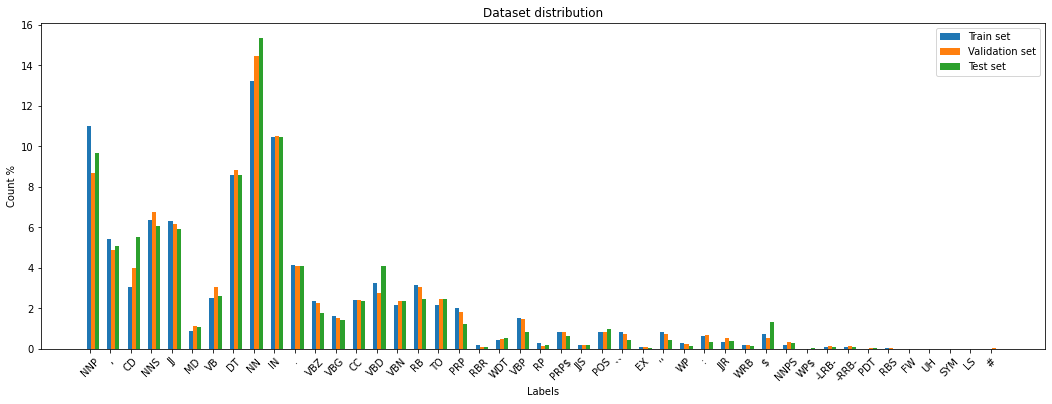

In [17]:
train_counts = train_set.groupby(by='label').count()
train_counts = train_counts / len(train_set) * 100
val_counts = val_set.groupby(by='label').count()
val_counts = val_counts / len(val_set) * 100
val_counts = val_counts.reindex(labels, fill_value=0)
test_counts = test_set.groupby(by='label').count()
test_counts = test_counts / len(test_set) * 100
test_counts = test_counts.reindex(labels, fill_value=0)
ind = np.arange(len(labels))

plt.figure(figsize=(18,6))
width = 0.2       
plt.bar(ind, train_counts.loc[labels, 'word'] , width, label='Train set');
plt.bar(ind + width, val_counts.loc[labels, 'word'], width, label='Validation set');
plt.bar(ind + 2*width, test_counts.loc[labels, 'word'], width, label='Test set');

plt.xlabel('Labels');
plt.ylabel('Count %');
plt.title('Dataset distribution');

plt.xticks(ind + width / 3, labels, rotation=45);
plt.legend();

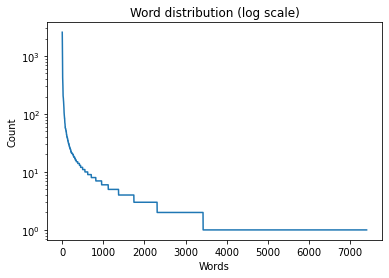

In [18]:
counts_word = train_set.groupby('word').count().to_numpy()[:, 0]

plt.plot(np.sort(counts_word)[::-1]);
plt.yscale('log')

plt.xlabel('Words');
plt.ylabel('Count');
plt.title('Word distribution (log scale)');

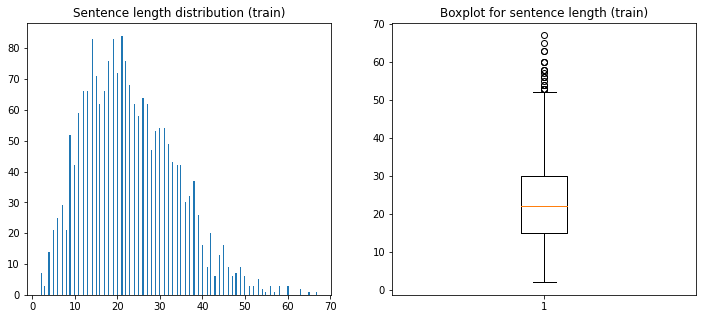

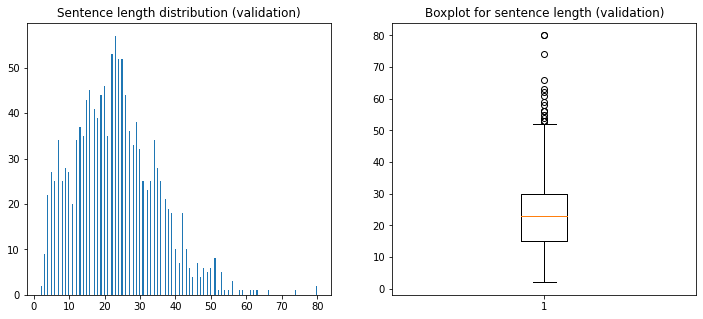

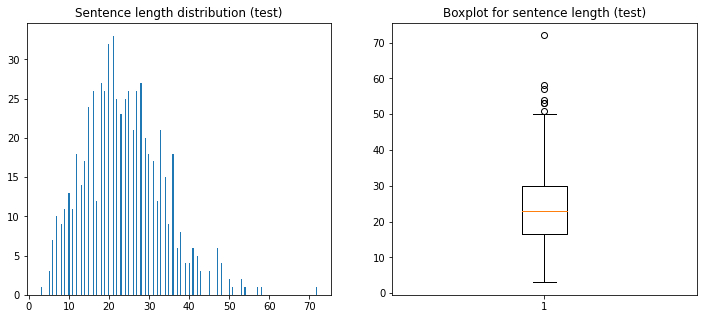

In [19]:
def make_plot(sentences, name):
  f = plt.figure(figsize=(12, 5))
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)

  ax1.hist(sentences.count()['word'], bins=250);
  ax1.set_title(f"Sentence length distribution ({name})");

  ax2.boxplot(sentences.count()['word']);
  ax2.set_title(f"Boxplot for sentence length ({name})");

name_sentences = {
    'train': train_grouped,
    'validation': val_grouped,
    'test': test_grouped
}

for name in name_sentences:
  make_plot(name_sentences[name], name)

# Create RNN, Optimizer and DataLoader classes


In [20]:
class RNN(nn.Module):
  """
    architecture: str
      'LSTM'   : the baseline architecture
      '2-LSTM' : 2 LSTM layers
      '2-FC'   : 2 Dense Layers
      'GRU'    : Gated Recurrent Unit
  """
  def __init__(self, architecture, input_dim, hidden_size, output_size, dropout, device, CRF=False):
    super(RNN, self).__init__()
    self.architecture = architecture
    self.n_layers = 2 if architecture == '2-LSTM' else 1
    self.dropout_in_rnn = dropout if self.n_layers > 1 else 0
    self.output_size = output_size
    self.hidden_size = hidden_size
    self.device = device
    self.CRF = torchcrf.CRF(output_size, batch_first=True) if CRF else None
    
    if self.architecture == 'GRU':
      self.rnn = nn.GRU(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True, dropout=self.dropout_in_rnn)
    else:
      self.rnn = nn.LSTM(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True, dropout=self.dropout_in_rnn)

    self.dropout_layer = nn.Dropout(p=dropout)

    if self.architecture == '2-FC':
      self.fc = nn.Sequential(
          nn.Linear(self.hidden_size*2, self.hidden_size),
          nn.Dropout(p=dropout),
          nn.Linear(self.hidden_size, output_size)
      )
    else:
      self.fc = nn.Linear(self.hidden_size*2, output_size)

    self.to(device)



  def forward(self, input):
    input = input.permute(1, 0, 2).to(self.device)

    hidden_state = torch.randn(self.n_layers*2, input.shape[1], self.hidden_size).to(self.device)
    if self.architecture == 'GRU':
      hidden = hidden_state
    else:
      cell_state = torch.randn(self.n_layers*2, input.shape[1], self.hidden_size).to(self.device)
      hidden = (hidden_state, cell_state)

    out, hidden = self.rnn(input, hidden)

    out = self.dropout_layer(out)

    #process timesteps independently 
    logits = self.fc(out.view(-1, out.size(2)))

    output = logits.view(input.shape[0], input.shape[1], self.output_size)

    return output.permute(1, 0, 2).contiguous()

  
  def compute_loss(self, input, target):
    target = target.to(self.device)
    pred = self(input)

    if self.CRF:
      target = target.squeeze()
      return -self.CRF(pred, target, mask= target!=-1,  reduction='mean')
    
    else:
      target = target.flatten()
      pred = pred.reshape(-1, pred.shape[-1])
      return nn.CrossEntropyLoss(ignore_index=-1)(pred, target)


  def prediction(self, input):
    self.eval()
    with torch.no_grad():
      scores = self(input)
      
      if self.CRF:
        classes_predicted = torch.Tensor(self.CRF.decode(scores))
      else:
        classes_predicted = torch.argmax(scores, 2)
  
      return classes_predicted.to(self.device)


  def accuracy(self, input: DataLoader):
    num_correct = 0
    num_samples = 0
    self.eval()

    for data in input:
        words = data['words'].to(self.device)
        labels = data['labels'].to(self.device)
        labels = labels.squeeze(-1)
        lengths = data['lengths'].to(self.device)

        classes_predicted = self.prediction(words)

        for i, length in enumerate(lengths):
          num_correct += torch.eq(classes_predicted[i, :length], labels[i, :length]).sum().item()

        num_samples += lengths.sum()
        
    
    return num_correct/num_samples



In [32]:
class Optimization:
    def __init__(self, model, optimizer, train_loader, val_loader):
      self.model = model
      self.optimizer = optimizer
      self.scheduler = ReduceLROnPlateau(optimizer)
      self.train_loader = train_loader
      self.history = []
      self.val_loader = val_loader
      self.val_history = []
    
    def train_epoch(self):
      self.model.train()

      for data in tqdm(self.train_loader):
        loss = self.model.compute_loss(data['words'], data['labels'])
        loss.backward()

        self.optimizer.step()
        self.optimizer.zero_grad()


      self.history.append(loss.item())

      val_loss = self._val_loss()
      self.scheduler.step(val_loss)

      return loss.item()

    def _val_loss(self):
      losses = []
      for data in self.val_loader:
        loss = self.model.compute_loss(data['words'], data['labels'])
        losses.append(loss)
      
      mean = torch.mean(torch.Tensor(losses))
      self.val_history.append(mean.item())

      return mean

In [22]:
class MyDataset(Dataset):
  def __init__(self, dataframe, embedder, encoder, max_length=None):
    self.max_length = max_length if max_length else dataframe.count().max()['word']
    self.dataframe = dataframe
    self.embedder = embedder
    self.encoder = encoder

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    sentence = self.dataframe.get_group(idx)[:self.max_length]

    labels = np.array(sentence['label'], dtype = str).reshape(-1, 1)
    encoded_labels = self.encoder.transform(labels)
    encoded_words = self.embedder[sentence['word']]

    return {'words': encoded_words, 'labels': encoded_labels, 'lengths': len(sentence)}

In [23]:
def collate_fn_pad(batch):
    batch_dict = []
    lengths = torch.Tensor([sample['lengths'] for sample in batch])
    padded_words = pad_sequence([torch.Tensor(sample['words']) for sample in batch], batch_first=True)
    padded_labels = pad_sequence([torch.Tensor(sample['labels']) for sample in batch], batch_first=True, padding_value=-1)

    return {'words': padded_words, 'labels': padded_labels.long(), 'lengths': lengths.int()}


# Training

In [24]:
%load_ext tensorboard
%tensorboard --logdir="logs"

<IPython.core.display.Javascript object>

## Training and tuning functions

In [25]:
def training_loop(model: nn.Module, 
                  train_set: torch.utils.data.DataLoader,
                  val_set: torch.utils.data.DataLoader,
                  patience: int,
                  optimization: Optimization,
                  save_path: str,
                  writer: Optional[SummaryWriter] = None):

  train_acc = []
  val_acc = []
  best_epoch = 0
  epoch = 0

  while epoch - best_epoch <= patience:
    epoch += 1
    print(f'Epoch {epoch}')

    optimization.train_epoch()
      
    print(f'loss:{optimization.history[-1] : .3f}')
    train_acc.append(model.accuracy(train_set))
    print(f'train acc:{train_acc[-1]}')
    val_acc.append(model.accuracy(val_set))
    print(f'val acc:{val_acc[-1]}')
    
    if writer:
      writer.add_scalars('Loss', {"Train": optimization.history[-1]}, epoch)
      writer.add_scalars('Loss', {"Validation": optimization.val_history[-1]}, epoch)
      writer.add_scalars('Train Acc', {"Train": val_acc[-1]}, epoch)
      writer.add_scalars('Val Acc', {"Train": val_acc[-1]}, epoch)
      writer.flush()

    if val_acc[-1] >= val_acc[best_epoch-1]:
      torch.save(model.state_dict(), save_path)
      best_epoch = epoch
      print(f'Model saved at {save_path}')
      
  if writer: writer.close()
  print(f'\n Best model at epoch {best_epoch}')

  return val_acc[best_epoch-1]

In [26]:
def tuning_loop(train_loader: torch.utils.data.DataLoader,
                val_loader: torch.utils.data.DataLoader,
                patience: int,
                search: dict, 
                writer: Optional[SummaryWriter] = None):

  best_model_acc = 0
  config = {}
  for current_values in itertools.product(*tuple(search.values())):
    current_dict = dict(zip(search.keys(), current_values))
    
    architecture = current_dict['architecture']
    CRF = current_dict['CRF']
    hidden_dim = current_dict['hidden_dim']
    dropout = current_dict['dropout']
    lr = current_dict['lr']
    weight_decay = current_dict['weight_decay'] 
    eps = current_dict['eps']

    print('='*15)
    print('New setting with', current_dict)

    model = RNN(architecture, EMBEDDING_SIZE, hidden_dim, len(labels), dropout, device, CRF=CRF)
    optimizer = optim.Adam(model.parameters(), lr=lr, eps=eps, weight_decay=weight_decay)
    optimization = Optimization(model, optimizer, train_loader, val_loader)

    path = f'model-{architecture}-{hidden_dim}-{dropout}-{lr}-{weight_decay}-{eps}.pkl'
    best_acc = training_loop(model, train_loader, val_loader, patience, optimization, path, writer=writer)

    if best_acc > best_model_acc:
      config = current_dict
      best_model_acc = best_acc
      new_path = f'model-{architecture}'
      !\cp $path $new_path

  print(f'\n Best model config : {config} with accuracy {best_model_acc}')

## Start tuning

In [29]:
train_set = MyDataset(train_grouped, embedder, encoder)
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, collate_fn=collate_fn_pad)

validation = MyDataset(val_grouped, embedder, encoder)
val_loader = DataLoader(validation, batch_size=len(validation), collate_fn=collate_fn_pad)

In [ ]:
search = {'architecture': ['LSTM', '2-LSTM', '2-FC', 'GRU'],
          'CRF': [True, False],
          'hidden_dim': [128, 256, 512],
          'dropout': [0.4, 0.6, 0.8],
          'lr': [1e-3],
          'weight_decay': [0, 1e-3, 1e-2, 1e-1],
          'eps': [1e-8]
          }


In [ ]:
PATIENCE = 10
writer = torch.utils.tensorboard.writer.SummaryWriter(log_dir=os.path.join("logs", "BiLSTM"))

tuning_loop(train_loader, val_loader, PATIENCE, search, writer)

New setting with {'architecture': '2-LSTM', 'CRF': True, 'hidden_dim': 128, 'dropout': 0.6, 'lr': 0.001, 'weight_decay': 0, 'eps': 1e-08}
Epoch 1


100%|██████████| 256/256 [00:21<00:00, 11.82it/s]


loss: 27.671
train acc:0.65550297498703
val acc:0.6397075057029724
Model saved at model-2-LSTM-128-0.6.pkl
Epoch 2


100%|██████████| 256/256 [00:20<00:00, 12.20it/s]


loss: 22.829
train acc:0.7769659757614136
val acc:0.7547381520271301
Model saved at model-2-LSTM-128-0.6.pkl
Epoch 3


100%|██████████| 256/256 [00:21<00:00, 12.16it/s]


loss: 11.543
train acc:0.8258721232414246
val acc:0.8028733134269714
Model saved at model-2-LSTM-128-0.6.pkl
Epoch 4


100%|██████████| 256/256 [00:19<00:00, 12.85it/s]


loss: 17.514
train acc:0.8501351475715637
val acc:0.8250007629394531
Model saved at model-2-LSTM-128-0.6.pkl
Epoch 5


100%|██████████| 256/256 [00:20<00:00, 12.23it/s]


loss: 12.834
train acc:0.8654658198356628
val acc:0.8393355011940002
Model saved at model-2-LSTM-128-0.6.pkl
Epoch 6


100%|██████████| 256/256 [00:20<00:00, 12.25it/s]


loss: 8.315
train acc:0.8809232115745544
val acc:0.8519706130027771
Model saved at model-2-LSTM-128-0.6.pkl
Epoch 7


100%|██████████| 256/256 [00:20<00:00, 12.20it/s]


loss: 14.353
train acc:0.8920727968215942
val acc:0.8601481318473816
Model saved at model-2-LSTM-128-0.6.pkl
Epoch 8


100%|██████████| 256/256 [00:20<00:00, 12.23it/s]


loss: 11.276
train acc:0.9040670394897461
val acc:0.8713721632957458
Model saved at model-2-LSTM-128-0.6.pkl
Epoch 9


100%|██████████| 256/256 [00:21<00:00, 12.03it/s]


loss: 9.451
train acc:0.908037006855011
val acc:0.8705704808235168
Epoch 10


100%|██████████| 256/256 [00:21<00:00, 11.67it/s]


loss: 10.693
train acc:0.9178984761238098


After tuning all the possible combinations of hyperparameters and architectures, the results are pretty similar. Across the architectures, usually, the  best combination of hyperparameters is: 
* hidden_dim = 128
* dropout = 0.6

Adding CRF makes the validation accuracy slightly better (around 0.5% more) but doubles the train time.

2-LSTM and 2-FC perform slightly better, so we decide to train them.

## Train best models

In [33]:
PATIENCE = 15
writer = torch.utils.tensorboard.writer.SummaryWriter(log_dir=os.path.join("logs", "BiLSTM"))

model_lstm = RNN('2-LSTM', EMBEDDING_SIZE, 128, len(labels), 0.6, device, CRF=True)
optimizer = optim.Adam(model_lstm.parameters(), lr=1e-3, eps=1e-8, weight_decay=1e-3)
optimization = Optimization(model_lstm, optimizer, train_loader, val_loader)

path = f'model-2-LSTM.pkl'
best_acc = training_loop(model_lstm, train_loader, val_loader, PATIENCE, optimization, path, writer=writer)

Epoch 1


100%|██████████| 256/256 [00:22<00:00, 11.34it/s]


loss: 38.219
train acc:0.6875158548355103
val acc:0.6697880029678345
Model saved at model-2-LSTM.pkl
Epoch 2


100%|██████████| 256/256 [00:21<00:00, 11.70it/s]


loss: 25.223
train acc:0.7873764634132385
val acc:0.7650963068008423
Model saved at model-2-LSTM.pkl
Epoch 3


100%|██████████| 256/256 [00:22<00:00, 11.56it/s]


loss: 11.798
train acc:0.8294196724891663
val acc:0.8076836466789246
Model saved at model-2-LSTM.pkl
Epoch 4


100%|██████████| 256/256 [00:21<00:00, 11.68it/s]


loss: 18.995
train acc:0.8492693305015564
val acc:0.8250648975372314
Model saved at model-2-LSTM.pkl
Epoch 5


100%|██████████| 256/256 [00:21<00:00, 12.08it/s]


loss: 10.988
train acc:0.8661626577377319
val acc:0.8389186263084412
Model saved at model-2-LSTM.pkl
Epoch 6


100%|██████████| 256/256 [00:21<00:00, 11.65it/s]


loss: 16.077
train acc:0.8820212483406067
val acc:0.8524516224861145
Model saved at model-2-LSTM.pkl
Epoch 7


100%|██████████| 256/256 [00:22<00:00, 11.52it/s]


loss: 8.862
train acc:0.8909325003623962
val acc:0.8624570965766907
Model saved at model-2-LSTM.pkl
Epoch 8


100%|██████████| 256/256 [00:22<00:00, 11.56it/s]


loss: 7.952
train acc:0.8994002938270569
val acc:0.866016685962677
Model saved at model-2-LSTM.pkl
Epoch 9


100%|██████████| 256/256 [00:21<00:00, 11.99it/s]


loss: 15.149
train acc:0.9072768092155457
val acc:0.8744187355041504
Model saved at model-2-LSTM.pkl
Epoch 10


100%|██████████| 256/256 [00:21<00:00, 11.83it/s]


loss: 7.021
train acc:0.9126826524734497
val acc:0.8771445751190186
Model saved at model-2-LSTM.pkl
Epoch 11


100%|██████████| 256/256 [00:22<00:00, 11.62it/s]


loss: 8.316
train acc:0.918341875076294
val acc:0.8808324933052063
Model saved at model-2-LSTM.pkl
Epoch 12


100%|██████████| 256/256 [00:21<00:00, 11.92it/s]


loss: 10.683
train acc:0.9244235157966614
val acc:0.8878555297851562
Model saved at model-2-LSTM.pkl
Epoch 13


100%|██████████| 256/256 [00:21<00:00, 11.93it/s]


loss: 7.807
train acc:0.9284567832946777
val acc:0.8879837989807129
Model saved at model-2-LSTM.pkl
Epoch 14


100%|██████████| 256/256 [00:21<00:00, 11.71it/s]


loss: 5.492
train acc:0.9346861839294434
val acc:0.8916075825691223
Model saved at model-2-LSTM.pkl
Epoch 15


100%|██████████| 256/256 [00:22<00:00, 11.16it/s]


loss: 7.093
train acc:0.9354463815689087
val acc:0.8928903341293335
Model saved at model-2-LSTM.pkl
Epoch 16


100%|██████████| 256/256 [00:22<00:00, 11.44it/s]


loss: 6.451
train acc:0.9401131868362427
val acc:0.8960330486297607
Model saved at model-2-LSTM.pkl
Epoch 17


100%|██████████| 256/256 [00:22<00:00, 11.45it/s]


loss: 8.172
train acc:0.9423937797546387
val acc:0.8946220278739929
Epoch 18


100%|██████████| 256/256 [00:22<00:00, 11.50it/s]


loss: 6.613
train acc:0.9465537667274475
val acc:0.8976685404777527
Model saved at model-2-LSTM.pkl
Epoch 19


100%|██████████| 256/256 [00:22<00:00, 11.24it/s]


loss: 7.135
train acc:0.9461947679519653
val acc:0.8957765102386475
Epoch 20


100%|██████████| 256/256 [00:21<00:00, 11.81it/s]


loss: 3.840
train acc:0.9522552490234375
val acc:0.8996888995170593
Model saved at model-2-LSTM.pkl
Epoch 21


100%|██████████| 256/256 [00:21<00:00, 11.96it/s]


loss: 4.215
train acc:0.9531632661819458
val acc:0.8996568322181702
Epoch 22


100%|██████████| 256/256 [00:22<00:00, 11.54it/s]


loss: 7.117
train acc:0.9560984969139099
val acc:0.9011640548706055
Model saved at model-2-LSTM.pkl
Epoch 23


100%|██████████| 256/256 [00:22<00:00, 11.32it/s]


loss: 3.937
train acc:0.9570487141609192
val acc:0.9020299315452576
Model saved at model-2-LSTM.pkl
Epoch 24


100%|██████████| 256/256 [00:22<00:00, 11.45it/s]


loss: 5.027
train acc:0.9589492082595825
val acc:0.9040502309799194
Model saved at model-2-LSTM.pkl
Epoch 25


100%|██████████| 256/256 [00:21<00:00, 11.67it/s]


loss: 7.647
train acc:0.9551904797554016
val acc:0.9002661108970642
Epoch 26


100%|██████████| 256/256 [00:22<00:00, 11.51it/s]


loss: 9.603
train acc:0.9626657366752625
val acc:0.9050764441490173
Model saved at model-2-LSTM.pkl
Epoch 27


100%|██████████| 256/256 [00:23<00:00, 11.07it/s]


loss: 2.635
train acc:0.965622067451477
val acc:0.9040822982788086
Epoch 28


100%|██████████| 256/256 [00:22<00:00, 11.63it/s]


loss: 4.837
train acc:0.9666779041290283
val acc:0.9041143655776978
Epoch 29


100%|██████████| 256/256 [00:22<00:00, 11.58it/s]


loss: 3.641
train acc:0.9651786088943481
val acc:0.905012309551239
Epoch 30


100%|██████████| 256/256 [00:22<00:00, 11.60it/s]


loss: 3.136
train acc:0.9672902822494507
val acc:0.9048519730567932
Epoch 31


100%|██████████| 256/256 [00:22<00:00, 11.47it/s]


loss: 2.187
train acc:0.9697820544242859
val acc:0.9067760705947876
Model saved at model-2-LSTM.pkl
Epoch 32


100%|██████████| 256/256 [00:21<00:00, 11.74it/s]


loss: 5.000
train acc:0.971724808216095
val acc:0.9071930050849915
Model saved at model-2-LSTM.pkl
Epoch 33


100%|██████████| 256/256 [00:20<00:00, 12.34it/s]


loss: 2.509
train acc:0.9710912704467773
val acc:0.9068402051925659
Epoch 34


100%|██████████| 256/256 [00:21<00:00, 11.79it/s]


loss: 3.604
train acc:0.9733507633209229
val acc:0.9076419472694397
Model saved at model-2-LSTM.pkl
Epoch 35


100%|██████████| 256/256 [00:21<00:00, 11.66it/s]


loss: 3.762
train acc:0.9751034379005432
val acc:0.9066798686981201
Epoch 36


100%|██████████| 256/256 [00:21<00:00, 11.94it/s]


loss: 5.022
train acc:0.9758425354957581
val acc:0.9077702164649963
Model saved at model-2-LSTM.pkl
Epoch 37


100%|██████████| 256/256 [00:20<00:00, 12.34it/s]


loss: 2.157
train acc:0.9776796698570251
val acc:0.909149169921875
Model saved at model-2-LSTM.pkl
Epoch 38


100%|██████████| 256/256 [00:22<00:00, 11.52it/s]


loss: 4.645
train acc:0.9774684906005859
val acc:0.9078022837638855
Epoch 39


100%|██████████| 256/256 [00:21<00:00, 11.87it/s]


loss: 2.820
train acc:0.9780809283256531
val acc:0.9075778126716614
Epoch 40


100%|██████████| 256/256 [00:21<00:00, 12.15it/s]


loss: 2.548
train acc:0.9797279834747314
val acc:0.9075778126716614
Epoch 41


100%|██████████| 256/256 [00:22<00:00, 11.46it/s]


loss: 4.376
train acc:0.9802348017692566
val acc:0.9074174761772156
Epoch 42


100%|██████████| 256/256 [00:22<00:00, 11.59it/s]


loss: 5.938
train acc:0.9821141958236694
val acc:0.9073533415794373
Epoch 43


100%|██████████| 256/256 [00:21<00:00, 11.87it/s]


loss: 3.071
train acc:0.9814173579216003
val acc:0.9085078239440918
Epoch 44


100%|██████████| 256/256 [00:22<00:00, 11.19it/s]


loss: 7.413
train acc:0.9825576543807983
val acc:0.9082191586494446
Epoch 45


100%|██████████| 256/256 [00:21<00:00, 11.86it/s]


loss: 4.989
train acc:0.9817340970039368
val acc:0.9083154201507568
Epoch 46


100%|██████████| 256/256 [00:22<00:00, 11.52it/s]


loss: 5.649
train acc:0.9827265739440918
val acc:0.9068402051925659
Epoch 47


100%|██████████| 256/256 [00:22<00:00, 11.20it/s]


loss: 2.703
train acc:0.9855139851570129
val acc:0.9095660448074341
Model saved at model-2-LSTM.pkl
Epoch 48


100%|██████████| 256/256 [00:22<00:00, 11.14it/s]


loss: 2.369
train acc:0.9860630035400391
val acc:0.9098226428031921
Model saved at model-2-LSTM.pkl
Epoch 49


100%|██████████| 256/256 [00:22<00:00, 11.56it/s]


loss: 5.375
train acc:0.9865698218345642
val acc:0.9100471138954163
Model saved at model-2-LSTM.pkl
Epoch 50


100%|██████████| 256/256 [00:23<00:00, 10.93it/s]


loss: 4.627
train acc:0.9864642024040222
val acc:0.9106884598731995
Model saved at model-2-LSTM.pkl
Epoch 51


100%|██████████| 256/256 [00:22<00:00, 11.15it/s]


loss: 4.736
train acc:0.98735111951828
val acc:0.910592257976532
Epoch 52


100%|██████████| 256/256 [00:22<00:00, 11.30it/s]


loss: 2.459
train acc:0.9872032999992371
val acc:0.9112977981567383
Model saved at model-2-LSTM.pkl
Epoch 53


100%|██████████| 256/256 [00:22<00:00, 11.47it/s]


loss: 3.817
train acc:0.9871188402175903
val acc:0.9105601906776428
Epoch 54


100%|██████████| 256/256 [00:22<00:00, 11.13it/s]


loss: 2.192
train acc:0.9876044988632202
val acc:0.9103677868843079
Epoch 55


100%|██████████| 256/256 [00:23<00:00, 11.03it/s]


loss: 2.546
train acc:0.9878367781639099
val acc:0.9112657308578491
Epoch 56


100%|██████████| 256/256 [00:22<00:00, 11.37it/s]


loss: 2.440
train acc:0.9883646965026855
val acc:0.9114902019500732
Model saved at model-2-LSTM.pkl
Epoch 57


100%|██████████| 256/256 [00:22<00:00, 11.50it/s]


loss: 3.786
train acc:0.988385796546936
val acc:0.9109771251678467
Epoch 58


100%|██████████| 256/256 [00:23<00:00, 11.08it/s]


loss: 1.608
train acc:0.9885969758033752
val acc:0.9106884598731995
Epoch 59


100%|██████████| 256/256 [00:23<00:00, 10.96it/s]


loss: 3.481
train acc:0.9885758757591248
val acc:0.9112015962600708
Epoch 60


100%|██████████| 256/256 [00:23<00:00, 11.13it/s]


loss: 3.245
train acc:0.988639235496521
val acc:0.9110091924667358
Epoch 61


100%|██████████| 256/256 [00:22<00:00, 11.41it/s]


loss: 3.082
train acc:0.9887447953224182
val acc:0.9101112484931946
Epoch 62


100%|██████████| 256/256 [00:21<00:00, 11.76it/s]


loss: 5.495
train acc:0.9887236952781677
val acc:0.9109129309654236
Epoch 63


100%|██████████| 256/256 [00:21<00:00, 11.70it/s]


loss: 3.887
train acc:0.9888715147972107
val acc:0.9106884598731995
Epoch 64


100%|██████████| 256/256 [00:21<00:00, 11.70it/s]


loss: 3.659
train acc:0.9885547757148743
val acc:0.9110733270645142
Epoch 65


100%|██████████| 256/256 [00:21<00:00, 11.92it/s]


loss: 1.853
train acc:0.9885547757148743
val acc:0.9109771251678467
Epoch 66


100%|██████████| 256/256 [00:21<00:00, 11.75it/s]


loss: 2.342
train acc:0.9884280562400818
val acc:0.9107525944709778
Epoch 67


100%|██████████| 256/256 [00:22<00:00, 11.60it/s]


loss: 2.770
train acc:0.9889137148857117
val acc:0.9106884598731995
Epoch 68


100%|██████████| 256/256 [00:21<00:00, 12.16it/s]


loss: 4.575
train acc:0.9887025952339172
val acc:0.9112977981567383
Epoch 69


100%|██████████| 256/256 [00:21<00:00, 11.98it/s]


loss: 3.436
train acc:0.9888081550598145
val acc:0.9107846617698669
Epoch 70


100%|██████████| 256/256 [00:22<00:00, 11.44it/s]


loss: 2.304
train acc:0.9887447953224182
val acc:0.9111374616622925
Epoch 71


100%|██████████| 256/256 [00:22<00:00, 11.28it/s]


loss: 4.361
train acc:0.9885969758033752
val acc:0.9115543365478516
Model saved at model-2-LSTM.pkl
Epoch 72


100%|██████████| 256/256 [00:22<00:00, 11.56it/s]


loss: 5.096
train acc:0.9890615344047546
val acc:0.9103677868843079
Epoch 73


100%|██████████| 256/256 [00:22<00:00, 11.56it/s]


loss: 5.547
train acc:0.9887025952339172
val acc:0.9105601906776428
Epoch 74


100%|██████████| 256/256 [00:22<00:00, 11.31it/s]


loss: 1.528
train acc:0.988681435585022
val acc:0.9108808636665344
Epoch 75


100%|██████████| 256/256 [00:23<00:00, 11.06it/s]


loss: 3.737
train acc:0.988681435585022
val acc:0.9104639887809753
Epoch 76


100%|██████████| 256/256 [00:22<00:00, 11.35it/s]


loss: 3.736
train acc:0.988681435585022
val acc:0.9107205271720886
Epoch 77


100%|██████████| 256/256 [00:22<00:00, 11.36it/s]


loss: 3.836
train acc:0.9885547757148743
val acc:0.9106243252754211
Epoch 78


100%|██████████| 256/256 [00:22<00:00, 11.24it/s]


loss: 2.346
train acc:0.9888081550598145
val acc:0.9102074503898621
Epoch 79


100%|██████████| 256/256 [00:23<00:00, 11.09it/s]


loss: 2.570
train acc:0.9889770746231079
val acc:0.911650538444519
Model saved at model-2-LSTM.pkl
Epoch 80


100%|██████████| 256/256 [00:23<00:00, 11.13it/s]


loss: 2.466
train acc:0.9888715147972107
val acc:0.9110733270645142
Epoch 81


100%|██████████| 256/256 [00:21<00:00, 11.92it/s]


loss: 2.874
train acc:0.9890404343605042
val acc:0.9111374616622925
Epoch 82


100%|██████████| 256/256 [00:22<00:00, 11.28it/s]


loss: 5.156
train acc:0.9887025952339172
val acc:0.9113298654556274
Epoch 83


100%|██████████| 256/256 [00:23<00:00, 10.86it/s]


loss: 2.083
train acc:0.9884491562843323
val acc:0.9109450578689575
Epoch 84


100%|██████████| 256/256 [00:22<00:00, 11.22it/s]


loss: 4.079
train acc:0.9891460537910461
val acc:0.9109129309654236
Epoch 85


100%|██████████| 256/256 [00:21<00:00, 11.65it/s]


loss: 3.513
train acc:0.9887025952339172
val acc:0.9107525944709778
Epoch 86


100%|██████████| 256/256 [00:21<00:00, 12.08it/s]


loss: 0.910
train acc:0.988533616065979
val acc:0.9112657308578491
Epoch 87


100%|██████████| 256/256 [00:22<00:00, 11.31it/s]


loss: 1.121
train acc:0.9889770746231079
val acc:0.9112977981567383
Epoch 88


100%|██████████| 256/256 [00:23<00:00, 11.09it/s]


loss: 3.466
train acc:0.988681435585022
val acc:0.9110733270645142
Epoch 89


100%|██████████| 256/256 [00:22<00:00, 11.33it/s]


loss: 1.914
train acc:0.988787055015564
val acc:0.9108487963676453
Epoch 90


100%|██████████| 256/256 [00:22<00:00, 11.60it/s]


loss: 4.136
train acc:0.9887236952781677
val acc:0.9111374616622925
Epoch 91


100%|██████████| 256/256 [00:23<00:00, 11.01it/s]


loss: 2.208
train acc:0.9886181354522705
val acc:0.9106884598731995
Epoch 92


100%|██████████| 256/256 [00:22<00:00, 11.39it/s]


loss: 1.870
train acc:0.9889137148857117
val acc:0.9099509119987488
Epoch 93


100%|██████████| 256/256 [00:22<00:00, 11.21it/s]


loss: 1.914
train acc:0.9886603355407715
val acc:0.9107525944709778
Epoch 94


100%|██████████| 256/256 [00:22<00:00, 11.50it/s]


loss: 3.093
train acc:0.9886603355407715
val acc:0.9108487963676453
Epoch 95


100%|██████████| 256/256 [00:22<00:00, 11.28it/s]


loss: 2.958
train acc:0.9884703159332275
val acc:0.9102074503898621

 Best model at epoch 79


In [35]:
model_fc = RNN('2-FC', EMBEDDING_SIZE, 128, len(labels), 0.6, device, CRF=True)
optimizer = optim.Adam(model_fc.parameters(), lr=1e-3, eps=1e-8, weight_decay=1e-3)
optimization = Optimization(model_fc, optimizer, train_loader, val_loader)

path = f'model-2-FC.pkl'
best_acc = training_loop(model_fc, train_loader, val_loader, PATIENCE, optimization, path, writer=writer)

Epoch 1


100%|██████████| 256/256 [00:19<00:00, 12.89it/s]


loss: 28.567
train acc:0.7101106643676758
val acc:0.6938716173171997
Model saved at model-2-FC.pkl
Epoch 2


100%|██████████| 256/256 [00:20<00:00, 12.63it/s]


loss: 14.602
train acc:0.7814004421234131
val acc:0.763396680355072
Model saved at model-2-FC.pkl
Epoch 3


100%|██████████| 256/256 [00:20<00:00, 12.61it/s]


loss: 22.006
train acc:0.8129909634590149
val acc:0.7930923700332642
Model saved at model-2-FC.pkl
Epoch 4


100%|██████████| 256/256 [00:19<00:00, 12.81it/s]


loss: 19.972
train acc:0.8369583487510681
val acc:0.816053569316864
Model saved at model-2-FC.pkl
Epoch 5


100%|██████████| 256/256 [00:19<00:00, 13.05it/s]


loss: 11.146
train acc:0.8495016098022461
val acc:0.8264438509941101
Model saved at model-2-FC.pkl
Epoch 6


100%|██████████| 256/256 [00:20<00:00, 12.79it/s]


loss: 14.231
train acc:0.8619182109832764
val acc:0.8411954641342163
Model saved at model-2-FC.pkl
Epoch 7


100%|██████████| 256/256 [00:20<00:00, 12.71it/s]


loss: 16.908
train acc:0.8711462020874023
val acc:0.8491485118865967
Model saved at model-2-FC.pkl
Epoch 8


100%|██████████| 256/256 [00:19<00:00, 12.93it/s]


loss: 10.724
train acc:0.8753061890602112
val acc:0.8554660677909851
Model saved at model-2-FC.pkl
Epoch 9


100%|██████████| 256/256 [00:20<00:00, 12.68it/s]


loss: 11.740
train acc:0.8862445950508118
val acc:0.858127772808075
Model saved at model-2-FC.pkl
Epoch 10


100%|██████████| 256/256 [00:20<00:00, 12.65it/s]


loss: 12.489
train acc:0.8925373554229736
val acc:0.8648622035980225
Model saved at model-2-FC.pkl
Epoch 11


100%|██████████| 256/256 [00:19<00:00, 12.84it/s]


loss: 9.756
train acc:0.897858738899231
val acc:0.8703780770301819
Model saved at model-2-FC.pkl
Epoch 12


100%|██████████| 256/256 [00:19<00:00, 12.83it/s]


loss: 9.214
train acc:0.9013218879699707
val acc:0.8726228475570679
Model saved at model-2-FC.pkl
Epoch 13


100%|██████████| 256/256 [00:20<00:00, 12.51it/s]


loss: 7.396
train acc:0.9076991081237793
val acc:0.878042459487915
Model saved at model-2-FC.pkl
Epoch 14


100%|██████████| 256/256 [00:19<00:00, 12.95it/s]


loss: 10.616
train acc:0.9099375009536743
val acc:0.8799024820327759
Model saved at model-2-FC.pkl
Epoch 15


100%|██████████| 256/256 [00:20<00:00, 12.73it/s]


loss: 10.743
train acc:0.912598192691803
val acc:0.8834941983222961
Model saved at model-2-FC.pkl
Epoch 16


100%|██████████| 256/256 [00:20<00:00, 12.41it/s]


loss: 8.339
train acc:0.9152377843856812
val acc:0.8831734657287598
Epoch 17


100%|██████████| 256/256 [00:19<00:00, 12.91it/s]


loss: 13.066
train acc:0.9198623299598694
val acc:0.8865407109260559
Model saved at model-2-FC.pkl
Epoch 18


100%|██████████| 256/256 [00:19<00:00, 13.07it/s]


loss: 11.673
train acc:0.9205380082130432
val acc:0.8870537877082825
Model saved at model-2-FC.pkl
Epoch 19


100%|██████████| 256/256 [00:20<00:00, 12.63it/s]


loss: 12.640
train acc:0.92583829164505
val acc:0.8899400234222412
Model saved at model-2-FC.pkl
Epoch 20


100%|██████████| 256/256 [00:19<00:00, 12.96it/s]


loss: 10.141
train acc:0.9246768951416016
val acc:0.8889458775520325
Epoch 21


100%|██████████| 256/256 [00:19<00:00, 12.94it/s]


loss: 13.462
train acc:0.92955482006073
val acc:0.8925054669380188
Model saved at model-2-FC.pkl
Epoch 22


100%|██████████| 256/256 [00:20<00:00, 12.69it/s]


loss: 6.940
train acc:0.9313497543334961
val acc:0.8941089510917664
Model saved at model-2-FC.pkl
Epoch 23


100%|██████████| 256/256 [00:19<00:00, 12.98it/s]


loss: 8.105
train acc:0.9315398335456848
val acc:0.8934034109115601
Epoch 24


100%|██████████| 256/256 [00:19<00:00, 12.85it/s]


loss: 6.842
train acc:0.9354252815246582
val acc:0.8927299976348877
Epoch 25


100%|██████████| 256/256 [00:20<00:00, 12.77it/s]


loss: 9.851
train acc:0.9378114342689514
val acc:0.8957444429397583
Model saved at model-2-FC.pkl
Epoch 26


100%|██████████| 256/256 [00:20<00:00, 12.68it/s]


loss: 5.418
train acc:0.9390573501586914
val acc:0.8967706561088562
Model saved at model-2-FC.pkl
Epoch 27


100%|██████████| 256/256 [00:19<00:00, 12.89it/s]


loss: 4.657
train acc:0.9392051696777344
val acc:0.8977968096733093
Model saved at model-2-FC.pkl
Epoch 28


100%|██████████| 256/256 [00:20<00:00, 12.77it/s]


loss: 5.631
train acc:0.9423515200614929
val acc:0.8974120020866394
Epoch 29


100%|██████████| 256/256 [00:20<00:00, 12.78it/s]


loss: 9.341
train acc:0.9426894187927246
val acc:0.8982458114624023
Model saved at model-2-FC.pkl
Epoch 30


100%|██████████| 256/256 [00:20<00:00, 12.75it/s]


loss: 6.935
train acc:0.944294273853302
val acc:0.9005868434906006
Model saved at model-2-FC.pkl
Epoch 31


100%|██████████| 256/256 [00:20<00:00, 12.70it/s]


loss: 5.864
train acc:0.9459835886955261
val acc:0.9002019762992859
Epoch 32


100%|██████████| 256/256 [00:19<00:00, 12.85it/s]


loss: 4.542
train acc:0.9460892081260681
val acc:0.9006830453872681
Model saved at model-2-FC.pkl
Epoch 33


100%|██████████| 256/256 [00:19<00:00, 12.99it/s]


loss: 7.784
train acc:0.9485598206520081
val acc:0.9023826718330383
Model saved at model-2-FC.pkl
Epoch 34


100%|██████████| 256/256 [00:20<00:00, 12.72it/s]


loss: 9.528
train acc:0.9492355585098267
val acc:0.9015488624572754
Epoch 35


100%|██████████| 256/256 [00:20<00:00, 12.64it/s]


loss: 12.617
train acc:0.9463847875595093
val acc:0.8993361592292786
Epoch 36


100%|██████████| 256/256 [00:19<00:00, 12.81it/s]


loss: 4.870
train acc:0.9502280354499817
val acc:0.9019337296485901
Epoch 37


100%|██████████| 256/256 [00:19<00:00, 12.82it/s]


loss: 8.551
train acc:0.952234148979187
val acc:0.9025430083274841
Model saved at model-2-FC.pkl
Epoch 38


100%|██████████| 256/256 [00:19<00:00, 13.02it/s]


loss: 4.984
train acc:0.9529731869697571
val acc:0.9026071429252625
Model saved at model-2-FC.pkl
Epoch 39


100%|██████████| 256/256 [00:19<00:00, 13.01it/s]


loss: 5.963
train acc:0.9540501832962036
val acc:0.9027354121208191
Model saved at model-2-FC.pkl
Epoch 40


100%|██████████| 256/256 [00:20<00:00, 12.71it/s]


loss: 3.814
train acc:0.9554649591445923
val acc:0.9036654233932495
Model saved at model-2-FC.pkl
Epoch 41


100%|██████████| 256/256 [00:20<00:00, 12.79it/s]


loss: 3.133
train acc:0.9559717774391174
val acc:0.9028316140174866
Epoch 42


100%|██████████| 256/256 [00:19<00:00, 12.96it/s]


loss: 9.534
train acc:0.9572809934616089
val acc:0.9046595692634583
Model saved at model-2-FC.pkl
Epoch 43


100%|██████████| 256/256 [00:20<00:00, 12.79it/s]


loss: 6.218
train acc:0.9582523703575134
val acc:0.9043067693710327
Epoch 44


100%|██████████| 256/256 [00:19<00:00, 13.04it/s]


loss: 5.562
train acc:0.9586113691329956
val acc:0.9046275019645691
Epoch 45


100%|██████████| 256/256 [00:19<00:00, 13.13it/s]


loss: 5.231
train acc:0.9590970277786255
val acc:0.9043709635734558
Epoch 46


100%|██████████| 256/256 [00:19<00:00, 12.85it/s]


loss: 8.760
train acc:0.9587802886962891
val acc:0.904819905757904
Model saved at model-2-FC.pkl
Epoch 47


100%|██████████| 256/256 [00:19<00:00, 12.81it/s]


loss: 4.411
train acc:0.9620111584663391
val acc:0.9073533415794373
Model saved at model-2-FC.pkl
Epoch 48


100%|██████████| 256/256 [00:19<00:00, 12.98it/s]


loss: 5.273
train acc:0.9621378183364868
val acc:0.9049802422523499
Epoch 49


100%|██████████| 256/256 [00:20<00:00, 12.75it/s]


loss: 7.216
train acc:0.9611664414405823
val acc:0.9041785001754761
Epoch 50


100%|██████████| 256/256 [00:19<00:00, 12.85it/s]


loss: 4.631
train acc:0.9644184112548828
val acc:0.9074174761772156
Model saved at model-2-FC.pkl
Epoch 51


100%|██████████| 256/256 [00:19<00:00, 13.03it/s]


loss: 8.040
train acc:0.964777410030365
val acc:0.907096803188324
Epoch 52


100%|██████████| 256/256 [00:19<00:00, 13.11it/s]


loss: 5.008
train acc:0.9643339514732361
val acc:0.9074174761772156
Model saved at model-2-FC.pkl
Epoch 53


100%|██████████| 256/256 [00:19<00:00, 13.00it/s]


loss: 4.160
train acc:0.9664456248283386
val acc:0.9055253863334656
Epoch 54


100%|██████████| 256/256 [00:20<00:00, 12.69it/s]


loss: 2.459
train acc:0.9651786088943481
val acc:0.9068081378936768
Epoch 55


100%|██████████| 256/256 [00:19<00:00, 13.02it/s]


loss: 5.422
train acc:0.9669312834739685
val acc:0.9086360931396484
Model saved at model-2-FC.pkl
Epoch 56


100%|██████████| 256/256 [00:19<00:00, 12.83it/s]


loss: 4.455
train acc:0.9662344455718994
val acc:0.9070326685905457
Epoch 57


100%|██████████| 256/256 [00:20<00:00, 12.78it/s]


loss: 6.108
train acc:0.9687684774398804
val acc:0.9072892069816589
Epoch 58


100%|██████████| 256/256 [00:19<00:00, 13.10it/s]


loss: 4.448
train acc:0.9687051177024841
val acc:0.9054612517356873
Epoch 59


100%|██████████| 256/256 [00:20<00:00, 12.80it/s]


loss: 6.207
train acc:0.969042956829071
val acc:0.9085719585418701
Epoch 60


100%|██████████| 256/256 [00:19<00:00, 12.81it/s]


loss: 7.111
train acc:0.9706689715385437
val acc:0.9085078239440918
Epoch 61


100%|██████████| 256/256 [00:19<00:00, 12.85it/s]


loss: 6.892
train acc:0.9704155325889587
val acc:0.9076419472694397
Epoch 62


100%|██████████| 256/256 [00:19<00:00, 13.01it/s]


loss: 5.363
train acc:0.9708801507949829
val acc:0.90895676612854
Model saved at model-2-FC.pkl
Epoch 63


100%|██████████| 256/256 [00:19<00:00, 12.94it/s]


loss: 6.520
train acc:0.9701199531555176
val acc:0.9067760705947876
Epoch 64


100%|██████████| 256/256 [00:19<00:00, 13.33it/s]


loss: 3.075
train acc:0.9725061058998108
val acc:0.9085719585418701
Epoch 65


100%|██████████| 256/256 [00:19<00:00, 12.86it/s]


loss: 2.281
train acc:0.9732452034950256
val acc:0.9099188446998596
Model saved at model-2-FC.pkl
Epoch 66


100%|██████████| 256/256 [00:19<00:00, 12.82it/s]


loss: 8.420
train acc:0.973709762096405
val acc:0.9088605642318726
Epoch 67


100%|██████████| 256/256 [00:19<00:00, 12.94it/s]


loss: 2.376
train acc:0.9741532206535339
val acc:0.9094698429107666
Epoch 68


100%|██████████| 256/256 [00:19<00:00, 12.89it/s]


loss: 1.831
train acc:0.9741954207420349
val acc:0.9088284969329834
Epoch 69


100%|██████████| 256/256 [00:20<00:00, 12.79it/s]


loss: 4.758
train acc:0.974892258644104
val acc:0.9098867774009705
Epoch 70


100%|██████████| 256/256 [00:19<00:00, 13.01it/s]


loss: 2.284
train acc:0.9748711585998535
val acc:0.9101433157920837
Model saved at model-2-FC.pkl
Epoch 71


100%|██████████| 256/256 [00:19<00:00, 13.09it/s]


loss: 6.520
train acc:0.9747655987739563
val acc:0.9095339775085449
Epoch 72


100%|██████████| 256/256 [00:19<00:00, 12.93it/s]


loss: 5.889
train acc:0.9750823378562927
val acc:0.9094698429107666
Epoch 73


100%|██████████| 256/256 [00:19<00:00, 12.99it/s]


loss: 6.087
train acc:0.9750612378120422
val acc:0.9102074503898621
Model saved at model-2-FC.pkl
Epoch 74


100%|██████████| 256/256 [00:19<00:00, 13.21it/s]


loss: 4.686
train acc:0.9749556183815002
val acc:0.90934157371521
Epoch 75


100%|██████████| 256/256 [00:19<00:00, 13.04it/s]


loss: 6.531
train acc:0.9753779768943787
val acc:0.9099509119987488
Epoch 76


100%|██████████| 256/256 [00:19<00:00, 13.02it/s]


loss: 5.053
train acc:0.9753146171569824
val acc:0.9088605642318726
Epoch 77


100%|██████████| 256/256 [00:19<00:00, 12.94it/s]


loss: 3.634
train acc:0.9754624366760254
val acc:0.9100471138954163
Epoch 78


100%|██████████| 256/256 [00:20<00:00, 12.66it/s]


loss: 4.951
train acc:0.9755257964134216
val acc:0.9098547101020813
Epoch 79


100%|██████████| 256/256 [00:20<00:00, 12.76it/s]


loss: 3.832
train acc:0.9755468964576721
val acc:0.9092453718185425
Epoch 80


100%|██████████| 256/256 [00:19<00:00, 12.85it/s]


loss: 2.548
train acc:0.9753779768943787
val acc:0.90895676612854
Epoch 81


100%|██████████| 256/256 [00:19<00:00, 13.04it/s]


loss: 4.968
train acc:0.9757158160209656
val acc:0.9091171026229858
Epoch 82


100%|██████████| 256/256 [00:19<00:00, 13.16it/s]


loss: 6.772
train acc:0.9756102561950684
val acc:0.9093095064163208
Epoch 83


100%|██████████| 256/256 [00:19<00:00, 13.47it/s]


loss: 3.871
train acc:0.9758214354515076
val acc:0.909790575504303
Epoch 84


100%|██████████| 256/256 [00:19<00:00, 13.06it/s]


loss: 5.824
train acc:0.9758847951889038
val acc:0.9096623063087463
Epoch 85


100%|██████████| 256/256 [00:19<00:00, 13.02it/s]


loss: 7.529
train acc:0.9756736159324646
val acc:0.9095019102096558
Epoch 86


100%|██████████| 256/256 [00:19<00:00, 13.16it/s]


loss: 3.399
train acc:0.9756947159767151
val acc:0.9092774391174316
Epoch 87


100%|██████████| 256/256 [00:19<00:00, 13.22it/s]


loss: 4.435
train acc:0.9758002758026123
val acc:0.9091812372207642
Epoch 88


100%|██████████| 256/256 [00:19<00:00, 13.01it/s]


loss: 4.510
train acc:0.9758214354515076
val acc:0.9094057083129883
Epoch 89


100%|██████████| 256/256 [00:19<00:00, 13.29it/s]


loss: 3.990
train acc:0.9758002758026123
val acc:0.9090529680252075

 Best model at epoch 73


# Confusion Matrix and Report


In [78]:
test_set = MyDataset(test_grouped, embedder, encoder)
test_loader = DataLoader(test_set, batch_size=len(test_set), shuffle=True, collate_fn=collate_fn_pad)

In [130]:
punctuation = np.array([',', '.', '``', "''",  ':', '#', '$' ])
mask = np.array([l not in punctuation for l in labels], dtype=int)
no_punc_labels = labels[mask == 1]

y_true = torch.Tensor()
y_pred_lstm = torch.Tensor().to(device)
y_pred_fc = torch.Tensor().to(device)

for data in test_loader:
  y_true = torch.cat((y_true, data['labels']), 0)
  y_pred_lstm = torch.cat((y_pred_lstm, model_lstm.prediction(data['words'])), 0)
  y_pred_fc = torch.cat((y_pred_fc, model_fc.prediction(data['words'])), 0)
  

y_true = y_true.squeeze().flatten().int()
y_pred_lstm = y_pred_lstm.flatten()
y_pred_fc = y_pred_fc.flatten()

In [131]:
report_lstm = classification_report(y_true, y_pred_lstm.cpu(), target_names=labels, output_dict=True, zero_division = 1)
report_fc = classification_report(y_true, y_pred_fc.cpu(), target_names=labels, output_dict=True, zero_division = 1)

In [132]:
from prettytable import PrettyTable

for report in [report_lstm, report_fc]:
  class_table = PrettyTable(['Class', 'Precision', 'Recall', 'f1-score', 'support'])

  macro_avg = np.zeros(3)
  weighted_avg = np.zeros(3)
  samples = int(report['macro avg']['support'])

  for label in no_punc_labels:
    class_table.add_row([str(label), report[label]['precision'], report[label]['recall'], report[label]['f1-score'], report[label]['support']])
    macro_avg += np.array([report[label]['precision'], report[label]['recall'], report[label]['f1-score']])
    weighted_avg += np.array([report[label]['precision'], report[label]['recall'], report[label]['f1-score']])*int(report[label]['support'])

  print(class_table)

  macro_avg = macro_avg/len(no_punc_labels)
  weighted_avg = weighted_avg/samples

  average_table = PrettyTable(['Average', 'Precision', 'Recall', 'f1-score', 'accuracy'])
  average_table.add_row(['macro avg', macro_avg[0],  macro_avg[1],  macro_avg[2], report['accuracy']])
  average_table.add_row(['weighted avg', weighted_avg[0],  weighted_avg[1],  weighted_avg[2], report['accuracy']])

  print(average_table)

+-------+----------------------+---------------------+---------------------+---------+
| Class |      Precision       |        Recall       |       f1-score      | support |
+-------+----------------------+---------------------+---------------------+---------+
|  NNP  |         1.0          |         0.0         |         0.0         |  76337  |
|   CD  |  0.9942528735632183  |         1.0         |  0.9971181556195965 |   173   |
|  NNS  |         1.0          |         1.0         |         1.0         |   225   |
|   JJ  |  0.999345977763244   |         1.0         |  0.9996728819103696 |   1528  |
|   MD  |  0.9090909090909091  |         1.0         |  0.9523809523809523 |    50   |
|   VB  |         0.85         |  0.9622641509433962 |  0.9026548672566371 |    53   |
|   DT  |  0.8855755894590847  |         1.0         |  0.9393159249724163 |   1277  |
|   NN  |  0.9953271028037384  |  0.9953271028037384 |  0.9953271028037384 |   214   |
|   IN  |  0.9946308724832215  |  0.9775725

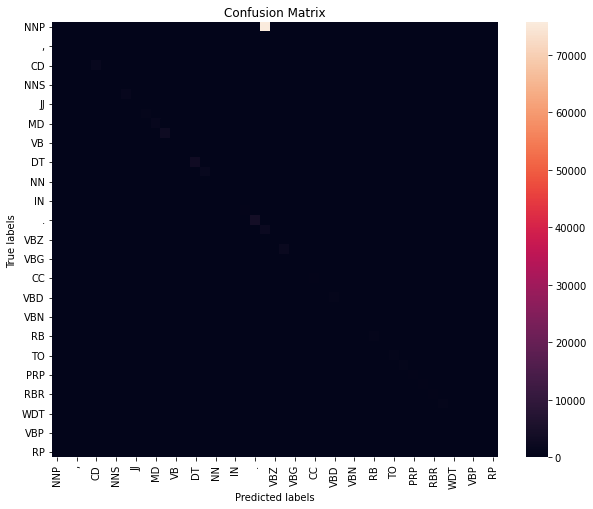

In [99]:
cm = confusion_matrix(y_true, y_pred_lstm.cpu())

plt.rcParams["figure.figsize"] = (10, 8)
ax= plt.subplot()
sns.heatmap(cm)

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels.flatten()); 
plt.xticks(rotation=90);
ax.yaxis.set_ticklabels(labels.flatten());
plt.yticks(rotation=0);